# Genre based poem classification using NLP and Machine Learning

### Data Source: [Kaggle](https://www.kaggle.com/datasets/ramjasmaurya/poem-classification-nlp)

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [236]:
test_df = pd.read_csv("/content/sample_data/Poem_classification - test_data.csv", encoding="UTF-8")
train_df = pd.read_csv("/content/sample_data/Poem_classification - train_data.csv", encoding="UTF-8")

In [237]:
# concatinating both dataframes into one single dataframe

data = pd.concat([train_df, test_df], axis=0)

data

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


In [238]:
# shuffling the dataframe

data = data.sample(frac=1)

data

,Genre,Poem
778,Environment,"The flags of war like storm-birds fly, The cha..."
270,Death,Admit it— you wanted the end with a serpentine...
699,Environment,I lie here thinking of you:—the stain of love ...
41,Music,"As from dark orchard leaves, from quiet script..."
59,Music,"dear reader, with our heels digging into the g..."
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
195,Music,They ask what I believe in— Sour milk: the cur...
197,Music,This fireman comes every afternoon to the café...
522,Affection,"Room after room,I hunt the house throughWe inh..."


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 778 to 558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   991 non-null    object
 1   Poem    987 non-null    object
dtypes: object(2)
memory usage: 23.2+ KB


In [240]:
data.describe()

,Genre,Poem
count,991,987
unique,4,909
top,Environment,"Shiitake, velvet foot, hen of the woods, woode..."
freq,252,3


In [241]:
data.isna().sum()

Genre    0
Poem     4
dtype: int64

In [242]:
print("before: ", data.shape)
data.dropna(inplace=True)
data = data.drop_duplicates()
print("after: ", data.shape)

before:  (991, 2)
after:  (984, 2)


Environment    252
Music          250
Death          241
Affection      241
Name: Genre, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'data')]

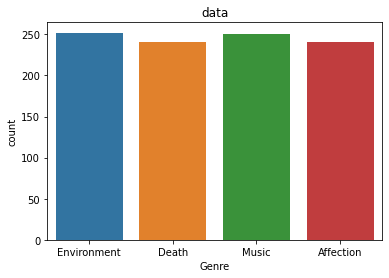

In [243]:
print(data.Genre.value_counts())
sns.countplot(data.Genre).set(title="data")

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'data with new output labels')]

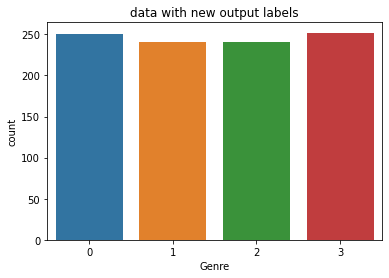

In [244]:
# converting the names of the Genre in respective output labels in integer format

data.Genre = data.Genre.map({'Music': 0, 'Death': 1, 'Affection': 2, 'Environment': 3})

sns.countplot(data.Genre).set(title='data with new output labels')

In [245]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [246]:
# tokenization of words

poems = data.Poem
poems = poems.apply(lambda x: ' '.join([w for w in word_tokenize(x)]))

In [247]:
# lemmatization of the words

lem = WordNetLemmatizer()

poems = poems.apply(lambda x: [lem.lemmatize(word.lower()) for word in word_tokenize(x)]).apply(lambda x: ' '.join(x))

In [248]:
# removing stop words from each poem

stops = stopwords.words('english')

poems = poems.apply(lambda x: [word for word in word_tokenize(x) if x not in stops]).apply(lambda x: ' '.join(x))

In [249]:
# vectorization

vec = TfidfVectorizer()
training_data = vec.fit_transform(poems)

In [250]:
print(training_data)

  (0, 2603)	0.19081882040205192
  (0, 3355)	0.1412076865403022
  (0, 3370)	0.1509540387543368
  (0, 7539)	0.09239254267889702
  (0, 3601)	0.11208954468329425
  (0, 3141)	0.1340974904343945
  (0, 8118)	0.11904337175201901
  (0, 6428)	0.09696755278860382
  (0, 7006)	0.09658618685760609
  (0, 3463)	0.1576149957169318
  (0, 925)	0.12087199158433028
  (0, 555)	0.16653301567532772
  (0, 7257)	0.15407581626945038
  (0, 3226)	0.19081882040205192
  (0, 776)	0.13924349365063104
  (0, 2424)	0.13258253668803605
  (0, 7506)	0.11904337175201901
  (0, 8246)	0.12608569464561176
  (0, 5657)	0.18007218061134472
  (0, 263)	0.14563536733833138
  (0, 3473)	0.17426540949940247
  (0, 3974)	0.12387570888230275
  (0, 4860)	0.14332917647874321
  (0, 5269)	0.16170067854504397
  (0, 1112)	0.1509540387543368
  :	:
  (983, 5545)	0.16880143936391143
  (983, 7703)	0.15828200489253888
  (983, 4551)	0.16880143936391143
  (983, 3070)	0.11831651750300132
  (983, 4253)	0.12704599279888495
  (983, 2720)	0.1165265583275124


In [251]:
y = data.Genre.values

y

array([3, 1, 3, 0, 0, 2, 0, 3, 3, 1, 3, 1, 3, 2, 0, 1, 0, 0, 3, 1, 2, 3,
       2, 1, 0, 2, 1, 3, 3, 2, 1, 3, 0, 1, 3, 2, 0, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 3, 1, 2, 1, 2, 0,
       1, 0, 3, 1, 0, 1, 1, 3, 2, 1, 2, 3, 0, 2, 1, 2, 2, 3, 3, 2, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1, 0, 1, 1, 3, 2, 1,
       0, 3, 1, 0, 1, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 3, 2, 2, 0, 3,
       0, 3, 0, 2, 3, 0, 2, 1, 0, 3, 2, 3, 3, 1, 1, 1, 0, 2, 2, 0, 3, 1,
       1, 1, 1, 2, 1, 3, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 3, 3, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 3, 3, 2, 0, 3, 2, 0,
       0, 1, 2, 1, 3, 3, 1, 1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 3, 2, 2, 1, 3,
       0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 2, 1, 1, 3, 1, 0, 0, 3, 2, 1,
       3, 0, 3, 2, 3, 0, 3, 1, 3, 2, 2, 2, 3, 1, 3, 0, 0, 3, 1, 1, 3, 3,
       0, 3, 3, 3, 0, 2, 3, 1, 0, 3, 0, 1, 2, 2, 3, 2, 0, 2, 0, 3, 1, 0,
       0, 2, 1, 3, 0, 0, 3, 0, 0, 1, 0, 2, 2, 2, 2,

In [252]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(training_data, y, test_size=0.30, random_state=1)

In [253]:
# Training the data using various Machine Learning Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [254]:
classifiers = [KNeighborsClassifier(n_neighbors=5), 
               MultinomialNB(), 
               SVC(), 
               DecisionTreeClassifier(), 
               RandomForestClassifier()]

for clf in classifiers:
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('-' * 100)
  print(f"Model: {clf}")
  print()
  print(accuracy_score(y_test, y_pred), end='\n')
  print()
  print(confusion_matrix(y_test, y_pred), end='\n')
  print()
  print(classification_report(y_test, y_pred))
  print()

----------------------------------------------------------------------------------------------------
Model: KNeighborsClassifier()

0.32094594594594594

[[20 22 20 12]
 [19 16 26  7]
 [ 8 18 39  8]
 [16 25 20 20]]

              precision    recall  f1-score   support

           0       0.32      0.27      0.29        74
           1       0.20      0.24      0.21        68
           2       0.37      0.53      0.44        73
           3       0.43      0.25      0.31        81

    accuracy                           0.32       296
   macro avg       0.33      0.32      0.31       296
weighted avg       0.33      0.32      0.32       296


----------------------------------------------------------------------------------------------------
Model: MultinomialNB()

0.3952702702702703

[[28 17 18 11]
 [25 20 16  7]
 [13 14 38  8]
 [14 15 21 31]]

              precision    recall  f1-score   support

           0       0.35      0.38      0.36        74
           1       0.30      0.29